In [1]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [2]:
numpy_data_path = "../../Training-baseline/"
image_data_path = "../../Pokemon-data/"

model = torch.load("./saved-models/aug-freeze-customLR.pt")
model = model.cpu()
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [3]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [4]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [(extract_type(idx), single_prediction) for idx, single_prediction in enumerate((softmax(prediction)*100))]
    prediction.sort(key=lambda x: x[1], reverse=True)
    prediction = [f"{single_prediction[0]}: {single_prediction[1]:.2f}%" for single_prediction in prediction]
    
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

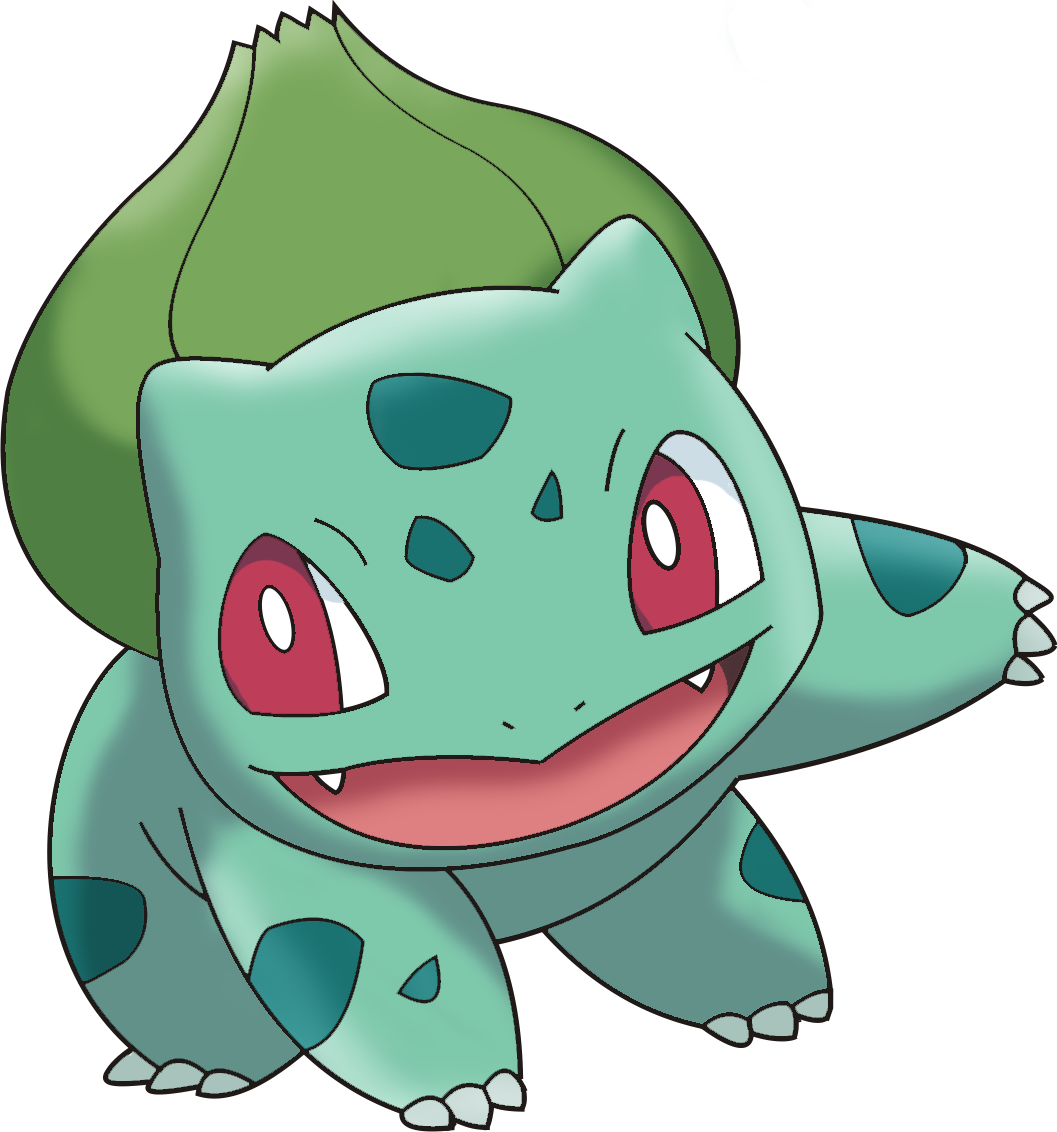

Model predicted: grass
grass: 45.03%	fairy: 39.02%	normal: 1.96%	dragon: 1.92%	water: 1.81%	psychic: 1.57%	
ghost: 1.37%	poison: 1.34%	fighting: 1.25%	rock: 0.93%	bug: 0.93%	fire: 0.73%	
dark: 0.59%	ground: 0.55%	flying: 0.54%	steel: 0.17%	electric: 0.16%	ice: 0.14%	


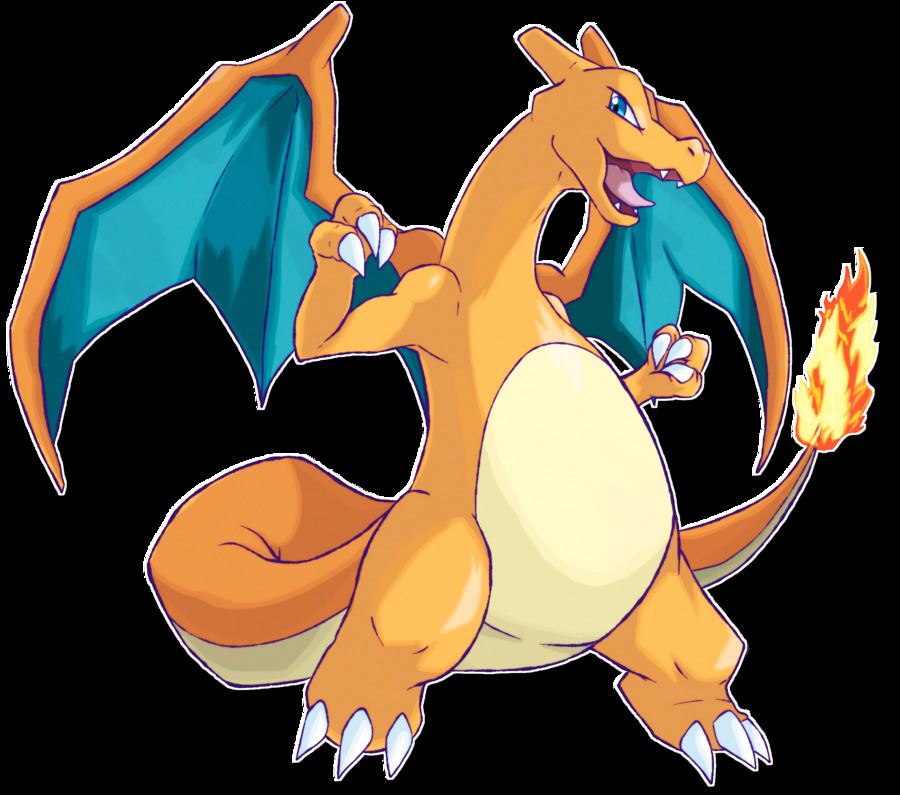

Model predicted: ice
ice: 26.15%	water: 16.37%	fairy: 13.10%	normal: 7.71%	fire: 7.03%	psychic: 5.29%	
fighting: 4.03%	poison: 3.87%	flying: 3.58%	dragon: 3.02%	ground: 1.77%	dark: 1.59%	
bug: 1.32%	steel: 1.30%	electric: 1.14%	grass: 1.04%	rock: 0.87%	ghost: 0.81%	


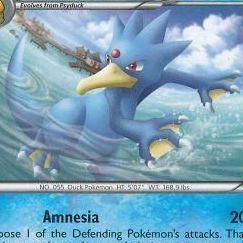

Model predicted: water
water: 43.64%	ice: 19.84%	fighting: 13.30%	normal: 5.38%	poison: 4.34%	dragon: 3.24%	
bug: 2.62%	steel: 1.96%	fire: 1.56%	psychic: 1.34%	rock: 1.06%	dark: 0.78%	
ground: 0.39%	electric: 0.24%	fairy: 0.13%	grass: 0.12%	ghost: 0.05%	flying: 0.02%	


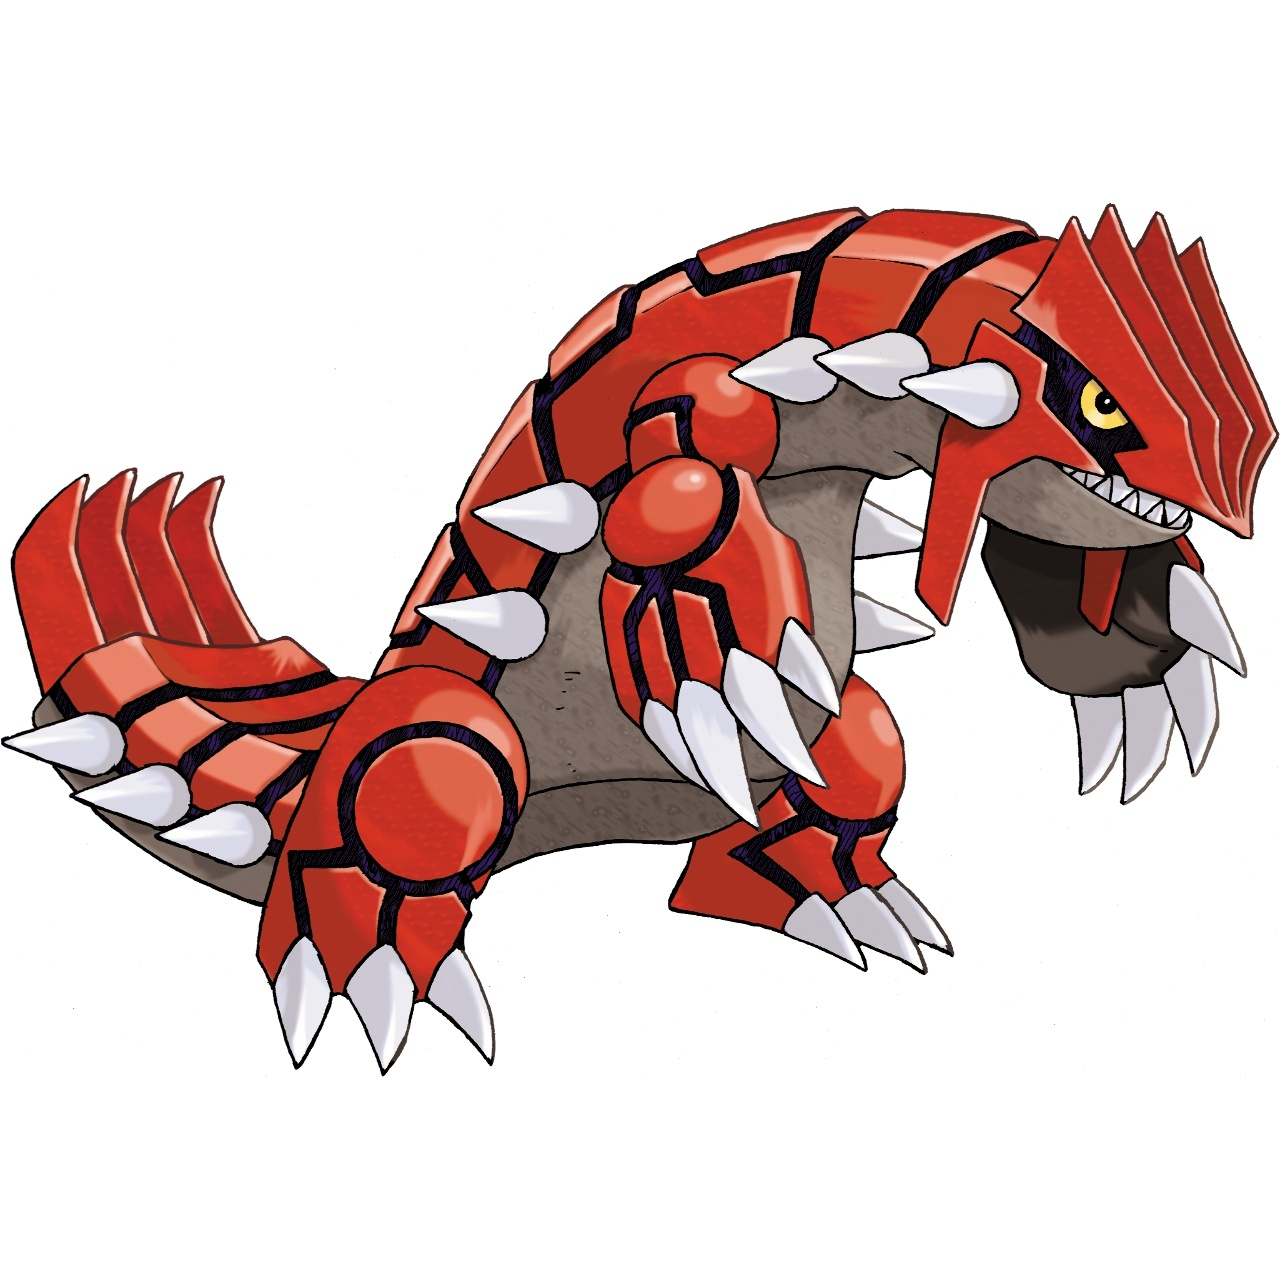

Model predicted: fairy
fairy: 28.15%	ice: 12.07%	normal: 9.44%	fire: 6.53%	bug: 5.90%	fighting: 4.80%	
ground: 4.70%	psychic: 4.43%	water: 4.41%	electric: 3.40%	steel: 3.33%	dragon: 3.28%	
rock: 2.86%	grass: 2.26%	dark: 1.90%	poison: 1.53%	ghost: 0.55%	flying: 0.45%	


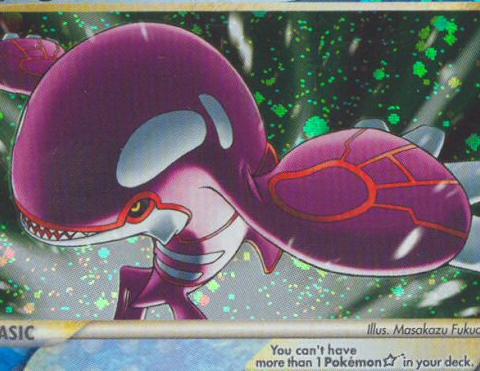

Model predicted: water
water: 30.60%	ghost: 20.74%	poison: 10.66%	ice: 10.19%	psychic: 7.77%	normal: 3.40%	
grass: 2.81%	steel: 2.18%	bug: 1.90%	rock: 1.83%	dragon: 1.37%	fairy: 1.33%	
ground: 1.11%	fighting: 1.03%	electric: 0.84%	dark: 0.82%	fire: 0.80%	flying: 0.62%	


In [7]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck", "Groudon", "Kyogre"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)